**Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/OnlineRetail.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [65]:
# Convert InvoiceDate to datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Remove Missing CustomerID

df_cleaned = df.dropna(subset=['CustomerID'])

In [ ]:
# Remove Negative Quantity and UnitPrice

df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

In [64]:
df_cleaned = df_cleaned.drop_duplicates()

In [67]:
# Create Total Sales Column

df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [ ]:
# Create YearMonth Column for Aggregation

df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

**Data Analysis**

In [ ]:
# Sales Overview

avg_quantity_per_order = df_cleaned.groupby('InvoiceNo')['Quantity'].mean().mean()
total_revenue = df_cleaned['TotalSales'].sum()
total_orders = df_cleaned['InvoiceNo'].nunique()
total_customers = df_cleaned['CustomerID'].nunique()

In [ ]:
print(f"Average Quantity per Order: {avg_quantity_per_order:.2f}")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")

Average Quantity per Order: 36.39
Total Revenue: $8887208.89
Total Orders: 18532
Total Customers: 4338


In [ ]:
# Top 10 Selling Products

top_10_products = df_cleaned.groupby('Description')['Quantity'].sum().nlargest(10)
print("\nTop 10 Selling Products:")
print(top_10_products)


Top 10 Selling Products:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [ ]:
# Monthly Sales Trends

monthly_sales = df_cleaned.groupby('YearMonth')['TotalSales'].sum()
print("\nMonthly Sales Trends:")
print(monthly_sales)


Monthly Sales Trends:
YearMonth
2010-12     570422.730
2011-01     568101.310
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     677355.150
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     517190.440
Freq: M, Name: TotalSales, dtype: float64


In [ ]:
#Top Customers by Revenue

top_customers = df_cleaned.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(10)
print("\nTop Customers by Revenue:")
print(top_customers)


Top Customers by Revenue:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalSales, dtype: float64


**Data Visualisation**

**Correlation Heatmap**

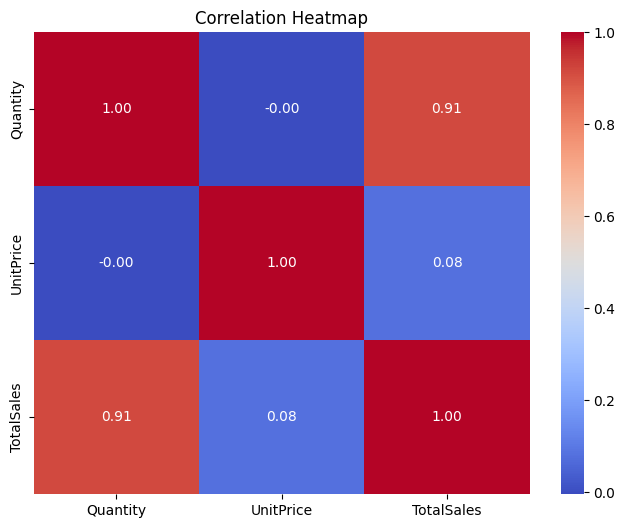

In [ ]:
# Correlation Heatmap

correlation_matrix = df_cleaned[['Quantity', 'UnitPrice', 'TotalSales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Count Plot**

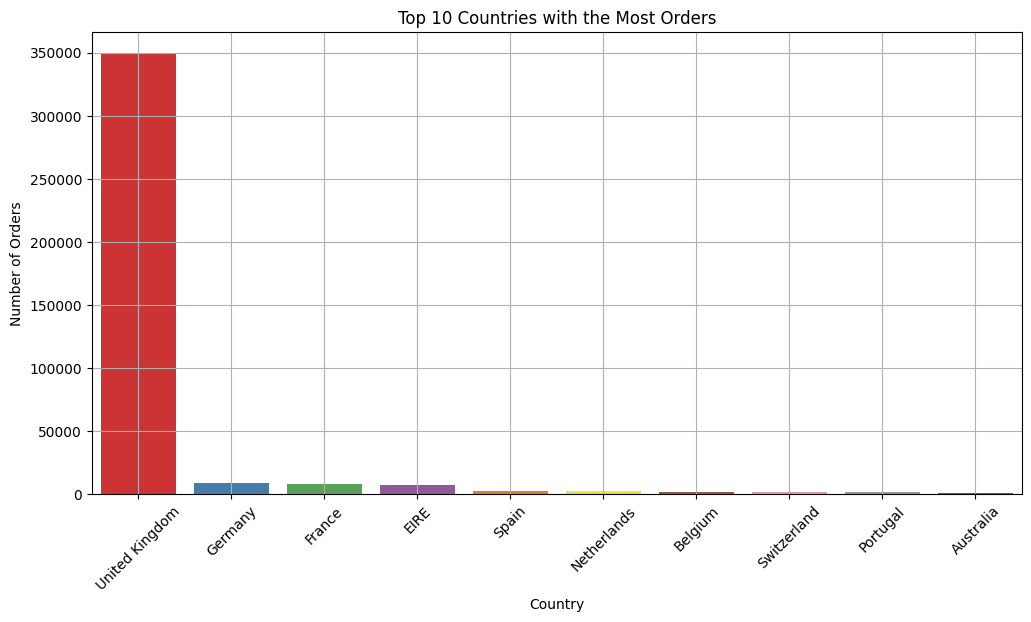

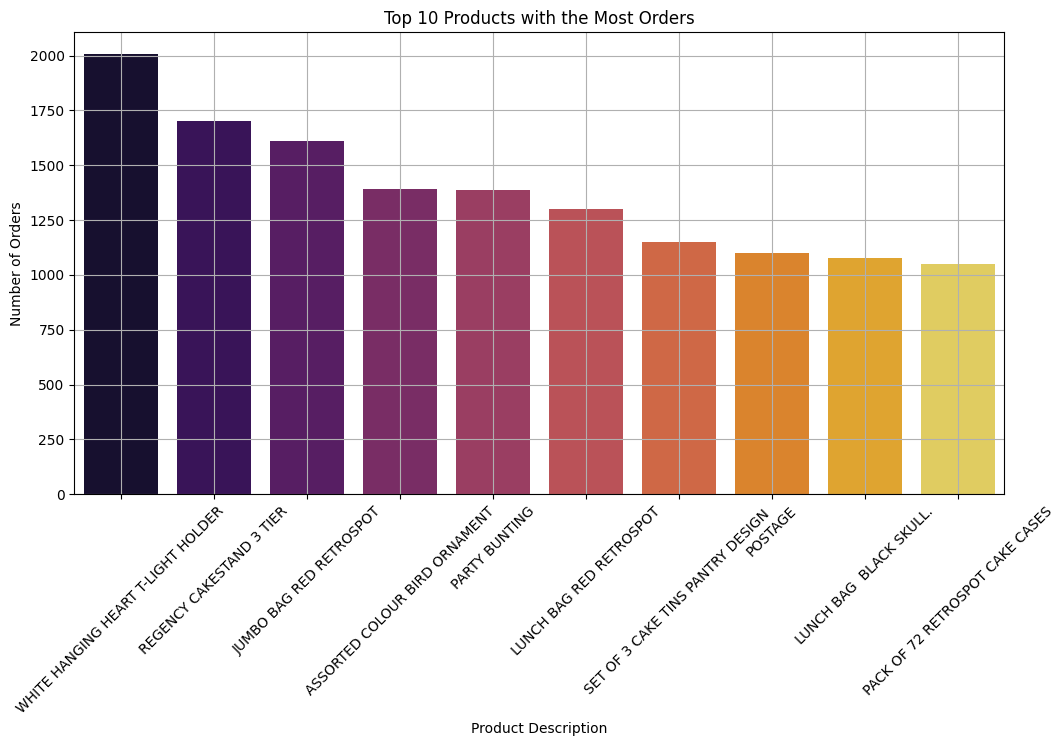

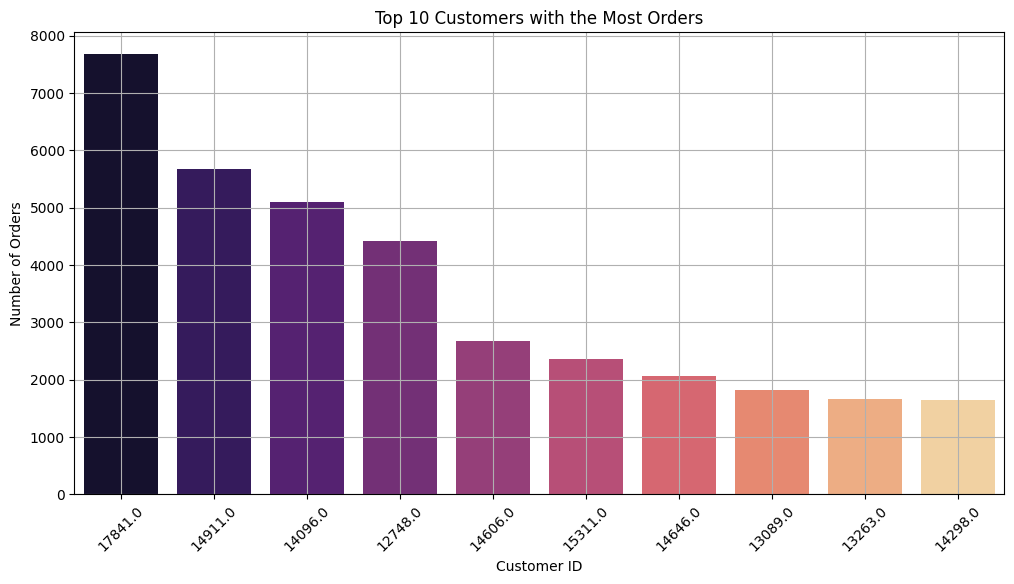

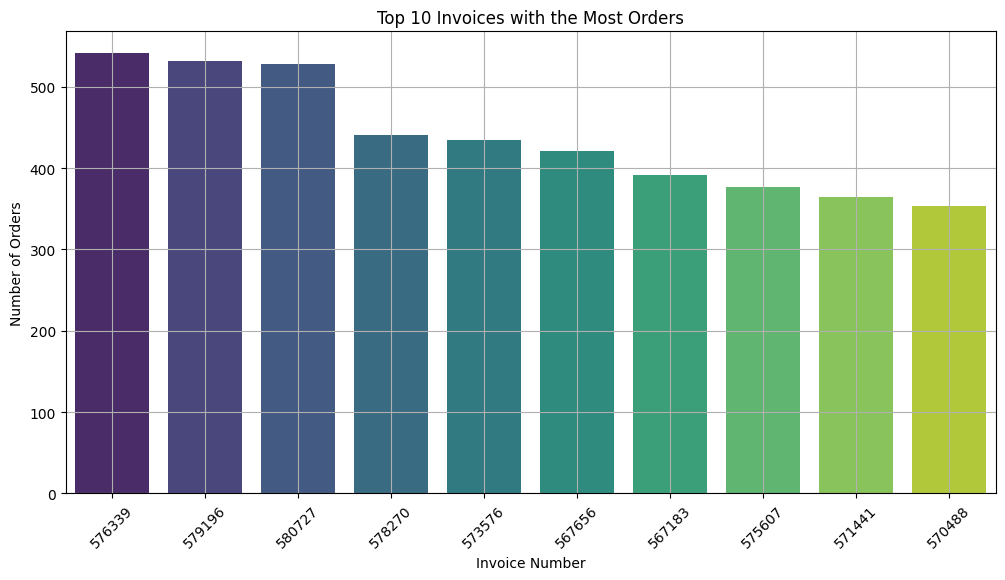

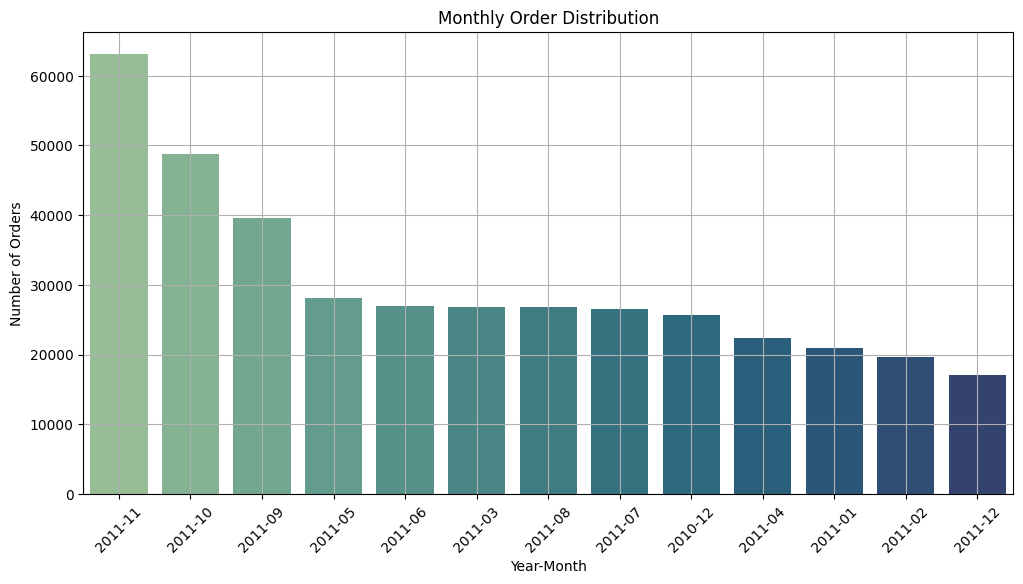

In [60]:
# Count Plot

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Country', order=df_cleaned['Country'].value_counts().index[:10], palette='Set1')
plt.title("Top 10 Countries with the Most Orders")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Description', order=df_cleaned['Description'].value_counts().index[:10], palette='inferno')
plt.title("Top 10 Products with the Most Orders")
plt.xlabel("Product Description")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='CustomerID', order=df_cleaned['CustomerID'].value_counts().index[:10], palette='magma')
plt.title("Top 10 Customers with the Most Orders")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='InvoiceNo', order=df_cleaned['InvoiceNo'].value_counts().index[:10], palette='viridis')
plt.title("Top 10 Invoices with the Most Orders")
plt.xlabel("Invoice Number")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='YearMonth', order=df_cleaned['YearMonth'].value_counts().index, palette='crest')
plt.title("Monthly Order Distribution")
plt.xlabel("Year-Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Bar Plot**

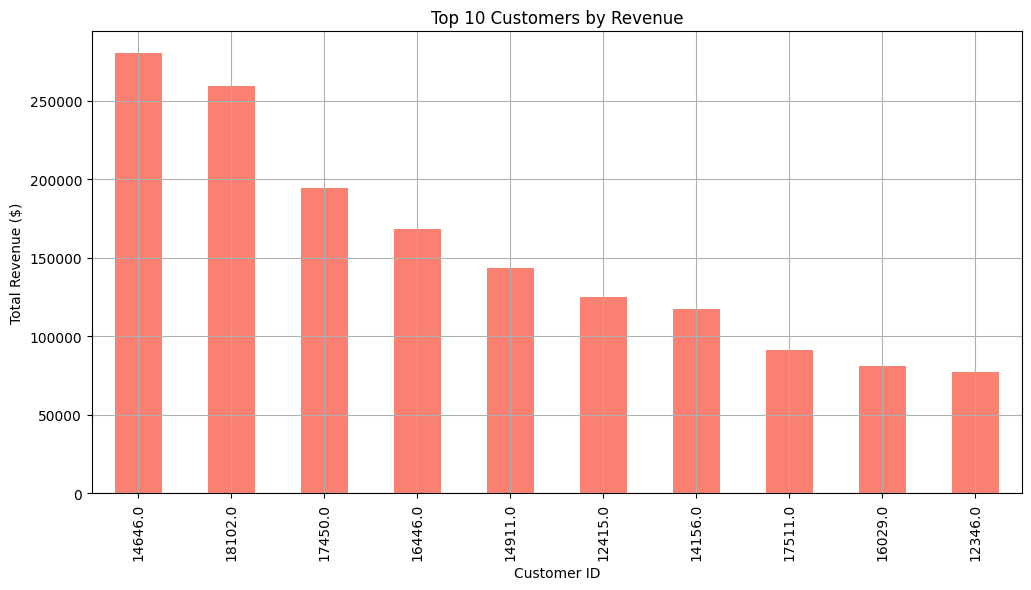

In [30]:
# Top 10 Customers by Revenue

plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='salmon')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue ($)")
plt.grid(True)
plt.show()

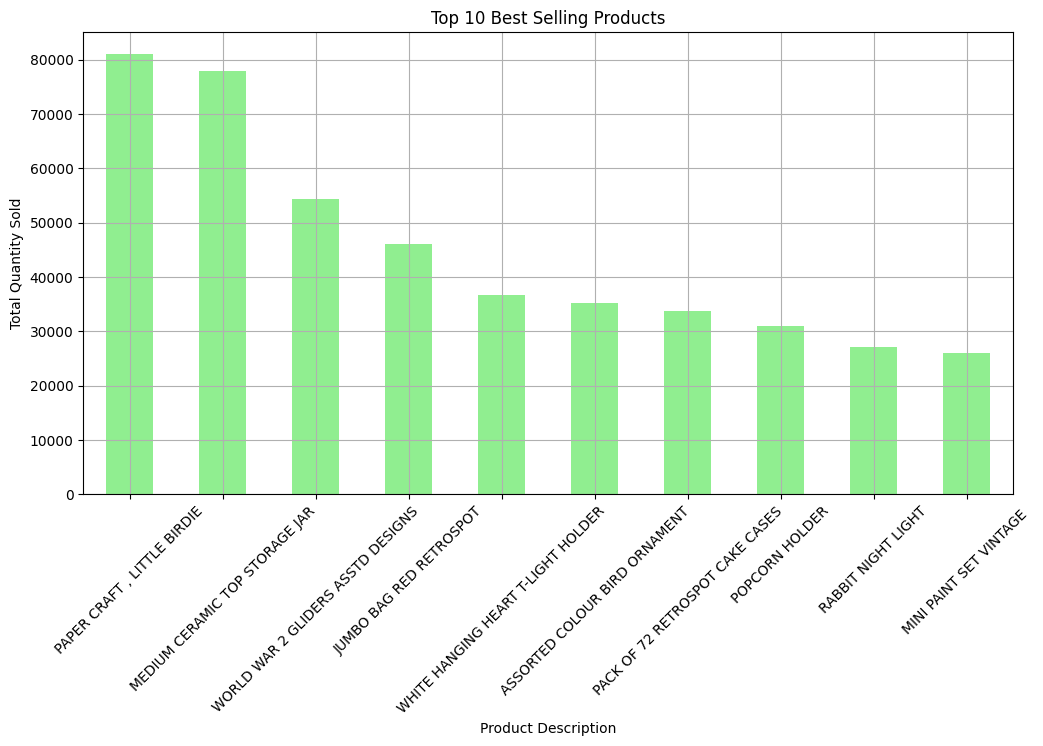

In [85]:
# Top 10 Best selling products

plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Best Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

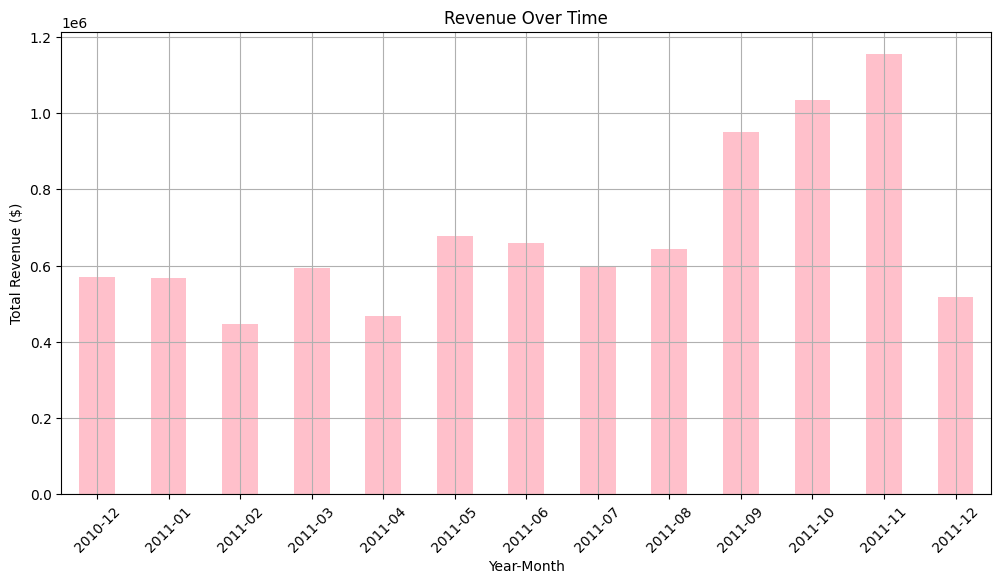

In [86]:
# Revenue Over Time

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='pink')
plt.title("Revenue Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


**Linechart**

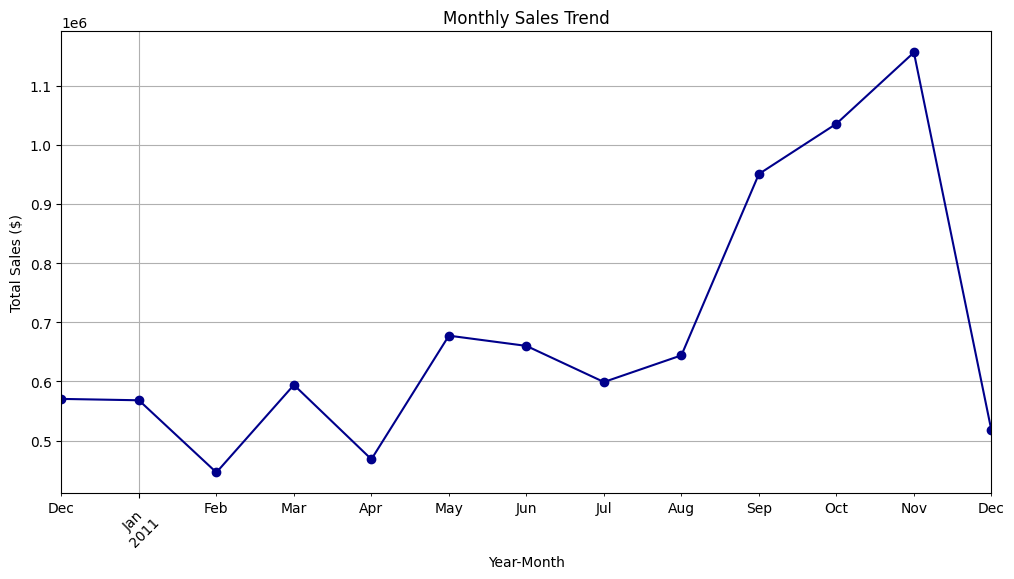

In [63]:
# Line Chart

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='darkblue')
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

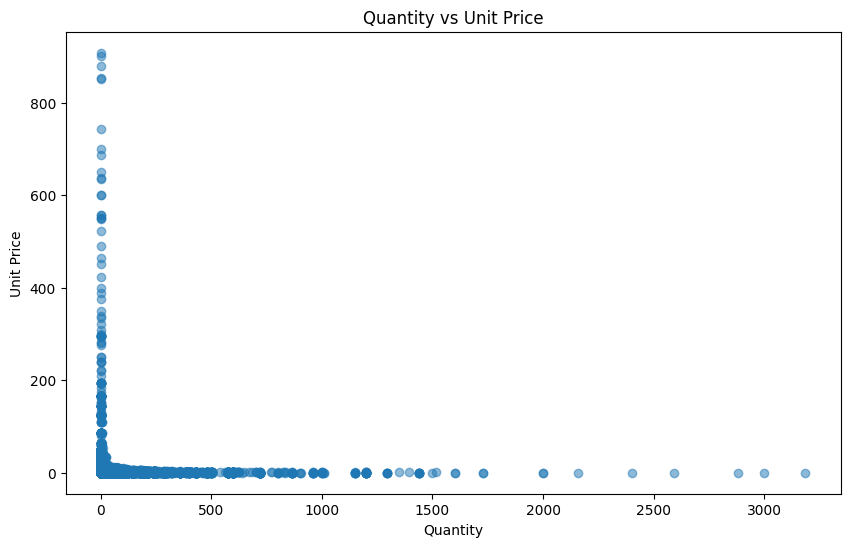

<function matplotlib.pyplot.show(close=None, block=None)>

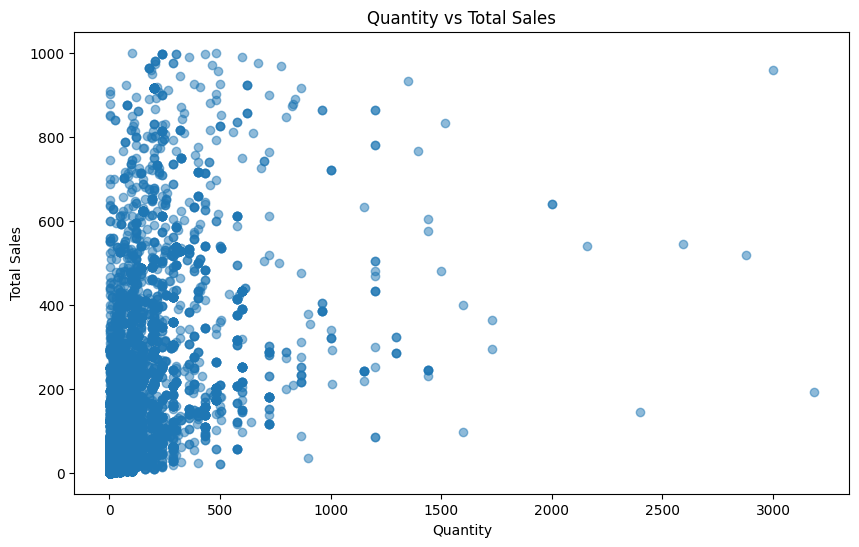

In [37]:
# Scatter Plot

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Quantity'], df_cleaned['UnitPrice'], alpha=0.5)
plt.title("Quantity vs Unit Price")
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Quantity'], df_cleaned['TotalSales'], alpha=0.5)
plt.title("Quantity vs Total Sales")
plt.xlabel("Quantity")
plt.ylabel("Total Sales")
plt.show

**Piechart**

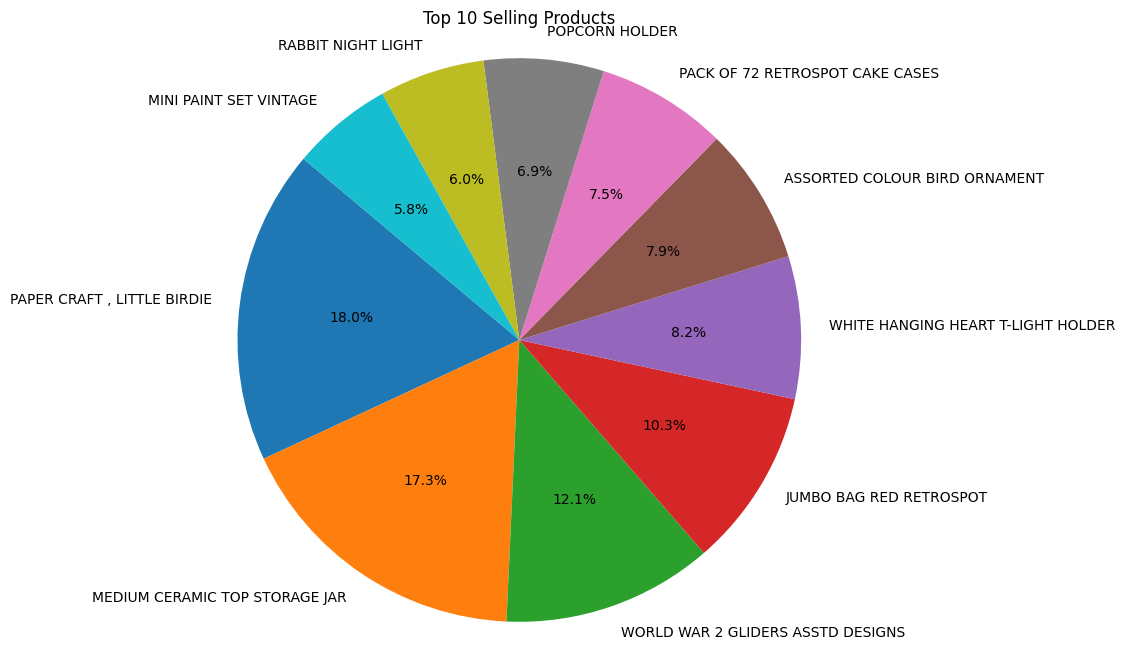

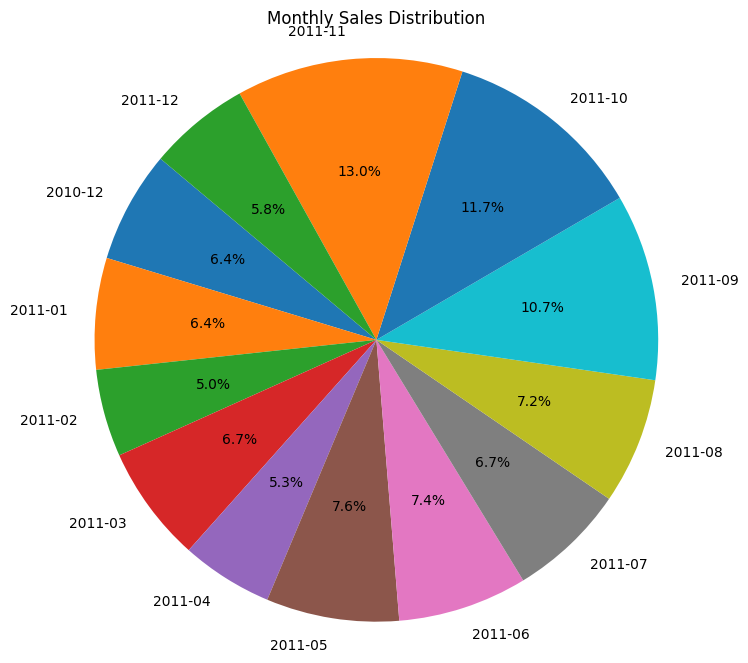

In [28]:
# Pie chart

plt.figure(figsize=(8, 8))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Selling Products")
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(monthly_sales, labels=monthly_sales.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title("Monthly Sales Distribution")
plt.axis('equal')
plt.show()

**Word Cloud**

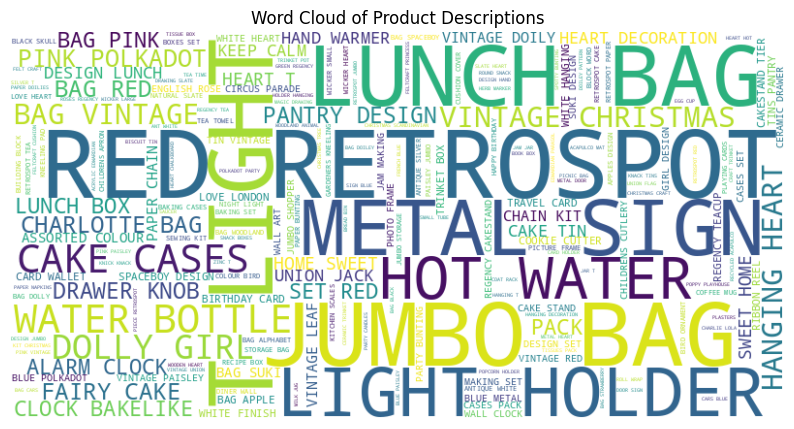

In [ ]:
# Word cloud

from wordcloud import WordCloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_cleaned['Description']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Descriptions')
plt.show()

**END**